### Giới thiệu về thư viện **pyodbc**

- Để hiểu về pyodbc là gì , trước hết ta cần biết ODBC là gì trước
##### ODBC là gì?
- ODBC (Open Database Connectivity) là một giao diện lập trình ứng dụng (API) tiêu chuẩn được phát triển bởi Microsoft.
- Mục tiêu của ODBC là tạo ra một "lớp trung gian" (middleware) cho phép một ứng dụng có thể truy cập dữ liệu từ nhiều hệ quản trị cơ sở dữ liệu (DBMS) khác nhau mà không cần phải viết code riêng cho từng loại.
- Nó hoạt động như một "phiên dịch viên" giữa ứng dụng của bạn và cơ sở dữ liệu.


In [13]:
import pandas as pd
import urllib
from sqlalchemy import create_engine
import pyodbc

# Chuỗi kết nối ODBC
connection_string = (
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=AUSTINNGUYEN;"
    "DATABASE=master;"
    "Trusted_Connection=yes;"
)

# Tạo connection để kiểm tra kết nối
conn = pyodbc.connect(connection_string, autocommit=True)
print("✅ Kết nối thành công với SQL Server.")

# Tạo SQLAlchemy engine để làm việc với pandas
params = urllib.parse.quote_plus(connection_string)
engine = create_engine("mssql+pyodbc:///?odbc_connect={}".format(params), fast_executemany=True)


✅ Kết nối thành công với SQL Server.


#### Tóm lại : 
pyodbc là một thư viện Python mạnh mẽ và linh hoạt, đóng vai trò là "cây cầu" nối Python với thế giới rộng lớn của các cơ sở dữ liệu thông qua tiêu chuẩn ODBC. Nó đặc biệt hữu ích khi làm việc với SQL Server và trong các môi trường yêu cầu kết nối tới nhiều loại cơ sở dữ liệu khác nhau.

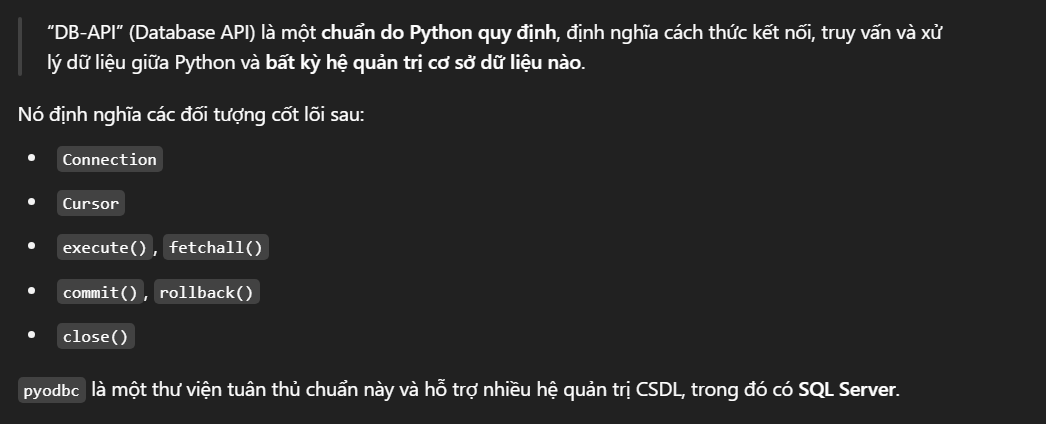


In [9]:
# Đọc dữ liệu từ file CSV
df = pd.read_csv("3. StudentsPerformance.csv", encoding="utf-8")
df.head()


,id,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,female,group B,bachelor's degree,standard,none,72,72,74
1,2,female,group C,some college,standard,completed,69,90,88
2,3,female,group B,master's degree,standard,none,90,95,93
3,4,male,group A,associate's degree,free/reduced,none,47,57,44
4,5,male,group C,some college,standard,none,76,78,75


In [14]:
# Ghi vào bảng 'students_performance', tạo bảng nếu chưa có
df.to_sql("students_performance", con=engine, if_exists="replace", index=False)
print("✅ Đã ghi dữ liệu vào bảng 'students_performance'")


✅ Đã ghi dữ liệu vào bảng 'students_performance'


In [11]:
df_check = pd.read_sql("SELECT * FROM students_performance", engine)
print("Dữ liệu trong bảng:")
print(df_check)


Dữ liệu trong bảng:
       id  gender     race parental level of education         lunch  \
0       1  female  group B           bachelor's degree      standard   
1       2  female  group C                some college      standard   
2       3  female  group B             master's degree      standard   
3       4    male  group A          associate's degree  free/reduced   
4       5    male  group C                some college      standard   
..    ...     ...      ...                         ...           ...   
995   996  female  group E             master's degree      standard   
996   997    male  group C                 high school  free/reduced   
997   998  female  group C                 high school  free/reduced   
998   999  female  group D                some college      standard   
999  1000  female  group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72    

In [25]:

%sql $params%reload_ext sql
%sql $params

 * mssql+pyodbc:///?odbc_connect=DRIVER%3D%7BODBC+Driver+17+for+SQL+Server%7D%3BSERVER%3DAUSTINNGUYEN%3BDATABASE%3DStudentDB%3BTrusted_Connection%3Dyes%3B%25reload_ext
(pyodbc.ProgrammingError) ('42000', "[42000] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]Incorrect syntax near '%'. (102) (SQLExecDirectW)")
[SQL: DRIVER%3D%7BODBC+Driver+17+for+SQL+Server%7D%3BSERVER%3DAUSTINNGUYEN%3BDATABASE%3DStudentDB%3BTrusted_Connection%3Dyes%3B%reload_ext sql]
(Background on this error at: https://sqlalche.me/e/14/f405)
 * mssql+pyodbc:///?odbc_connect=DRIVER%3D%7BODBC+Driver+17+for+SQL+Server%7D%3BSERVER%3DAUSTINNGUYEN%3BDATABASE%3DStudentDB%3BTrusted_Connection%3Dyes%3B%25reload_ext
(pyodbc.ProgrammingError) ('42000', "[42000] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]Incorrect syntax near '%'. (102) (SQLExecDirectW)")
[SQL: DRIVER%3D%7BODBC+Driver+17+for+SQL+Server%7D%3BSERVER%3DAUSTINNGUYEN%3BDATABASE%3DStudentDB%3BTrusted_Connection%3Dyes%3B]
(Background on this error at

In [ ]:
#!pip install sqlalchemy==1.4.49

In [36]:
%%sql
SELECT TOP 5 * FROM students_performance;


 * mssql+pyodbc:///?odbc_connect=DRIVER%3D%7BODBC+Driver+17+for+SQL+Server%7D%3BSERVER%3DAUSTINNGUYEN%3BDATABASE%3DStudentDB%3BTrusted_Connection%3Dyes%3B%25reload_ext
Done.


id,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score
1,female,group B,bachelor's degree,standard,none,72,72,74
2,female,group C,some college,standard,completed,69,90,88
3,female,group B,master's degree,standard,none,90,95,93
4,male,group A,associate's degree,free/reduced,none,47,57,44
5,male,group C,some college,standard,none,76,78,75


In [ ]:
import sqlalchemy
print(sqlalchemy.__version__)


1.4.49


In [35]:
%%sql
SELECT gender,
       AVG([math score]) AS avg_math,
       AVG([reading score]) AS avg_reading,
       AVG([writing score]) AS avg_writing
FROM students_performance
GROUP BY gender


 * mssql+pyodbc:///?odbc_connect=DRIVER%3D%7BODBC+Driver+17+for+SQL+Server%7D%3BSERVER%3DAUSTINNGUYEN%3BDATABASE%3DStudentDB%3BTrusted_Connection%3Dyes%3B%25reload_ext
Done.


gender,avg_math,avg_reading,avg_writing
female,63,72,72
male,68,65,63
